In [1]:
import SentimentAnalysis
%matplotlib inline

1. read data

In [2]:
text_data = SentimentAnalysis.TextSentiment()
text_data.read_data('all-data.csv')
text_data.drop_duplicates()
text_data.make_labels()
text_data.clean_text()

In [3]:
text_data.df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4838 entries, 0 to 4845
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4838 non-null   object
 1   text       4838 non-null   object
 2   label      4838 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 151.2+ KB


2. wordcloud

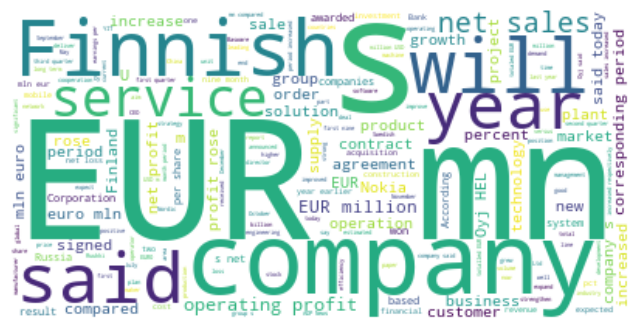

In [4]:
text_data.plot_word_cloud(sentiment='positive')

3. count plot

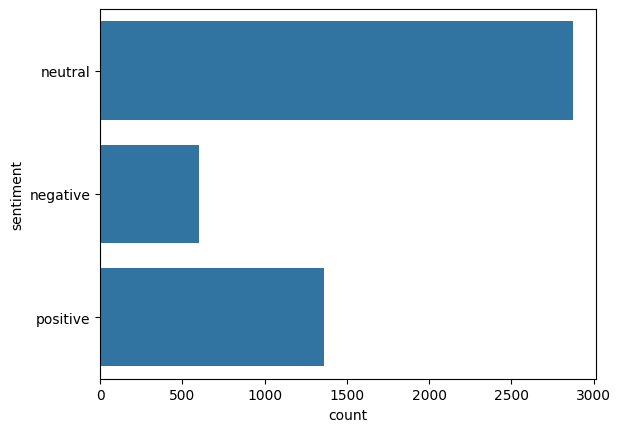

In [5]:
text_data.plot_counts()

4. build classification model

In [6]:
model = SentimentAnalysis.Model()

In [7]:
train_df, test_df = model.train_test_split(text_data.df)

In [8]:
model.train(train_df)

Map:   0%|          | 0/3870 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
E:\anaconda3\envs\d2l-cuda113\lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.990900,0.783304
2,0.543200,0.971709
3,0.240500,1.028201
4,0.162200,1.170931
5,0.228900,1.139218
6,0.121400,1.467507
7,0.132700,1.226869
8,0.037000,1.435912
9,0.053600,1.255472
10,0.135400,1.050357


In [9]:
predictions = model.predict(test_df)

Map:   0%|          | 0/968 [00:00<?, ? examples/s]

5. model evaluation

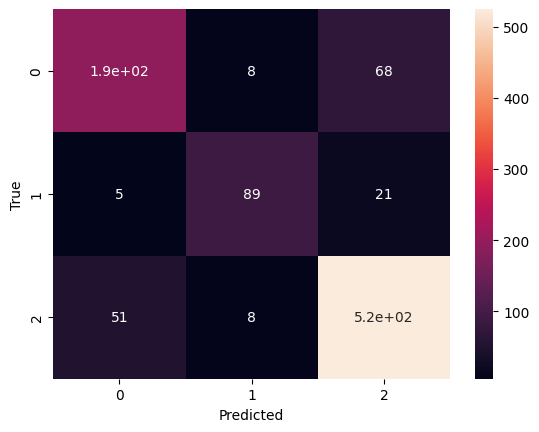

In [10]:
y_pred = predictions.predictions.argmax(axis=1)
y_true = test_df['label']
model.plot_confusion_matrix(y_pred, y_true)

In [11]:
print(model.report_eval_stats(y_pred, y_true))

              precision    recall  f1-score   support

    positive       0.78      0.72      0.75       269
     neutral       0.85      0.77      0.81       115
    negative       0.86      0.90      0.88       584

    accuracy                           0.83       968
   macro avg       0.83      0.80      0.81       968
weighted avg       0.83      0.83      0.83       968



In [12]:
result = model.classify("According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .")
print(result)

negative
